In [2]:
#KUTUPHANELERİMİZİ İMPORT EDELIM
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn import metrics


warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.width', 10000)

In [3]:
#VERIMIZI OKUTALIM
df=pd.read_csv("1_veri_onisleme.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,POSITION,EXPERIENCE,GENDER,COMPANY,WORK_TYPE,CITY,CURRENCY,SALARY_AVG_TL
0,Middle,BACK-END DEVELOPER,3 - 5 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,15499
1,Junior,FRONT-END DEVELOPER,0 - 1 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,8499
2,Middle,BACK-END DEVELOPER,1 - 3 Yıl,Erkek,Outsource,Remote,yurt_ici,₺ - Türk Lirası,15499
3,Junior,FULL STACK DEVELOPER,1 - 3 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,10499
4,Junior,BACK-END DEVELOPER,0 - 1 Yıl,Erkek,Kurumsal,Geçici Hibrit,yurt_ici,₺ - Türk Lirası,5499


In [4]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [5]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df)

Observations: 5026
Variables: 9
cat_cols: 8
num_cols: 1
cat_but_car: 0
num_but_cat: 0


In [6]:
#KATEGORİK DEGİSKENLERİN VERİ İCİNDEKİ DAGILIMINA BAKALIM

In [7]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe) #gorsellestirmek istiyorsak yukarıdaki "plot=False"u True yaparız
        plt.show()

        LEVEL      Ratio
Senior   2117  42.120971
Middle   1623  32.292081
Junior   1286  25.586948
##########################################


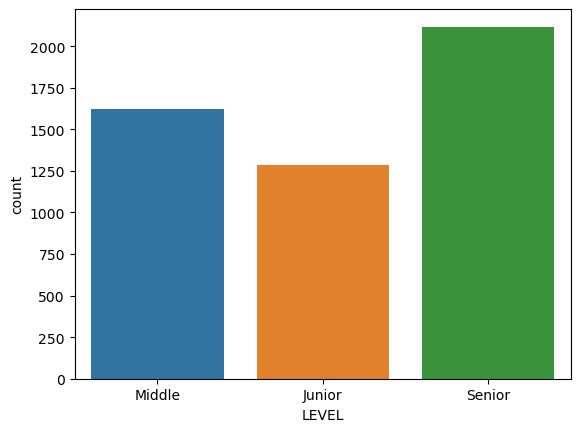

                                POSITION      Ratio
FULL STACK DEVELOPER                1441  28.670911
BACK-END DEVELOPER                  1290  25.666534
FRONT-END DEVELOPER                  576  11.460406
MOBILE APPLICATION DEVELOPER         453   9.013132
TEAM / TECH LEAD                     296   5.889375
DATA SCIENTIST                       150   2.984481
SOFTWARE DEVELOPMENT MANAGER         149   2.964584
SOFTWARE ARCHITECT                   126   2.506964
EMBEDDED SOFTWARE DEVELOPER          118   2.347791
DEVOPS ENGINEER                       96   1.910068
QA / TEST AUTOMATION DEVELOPER        95   1.890171
GAME DEVELOPER                        89   1.770792
OTHERS                                63   1.253482
CTO                                   51   1.014723
DATABASE ADMIN                        33   0.656586
##########################################


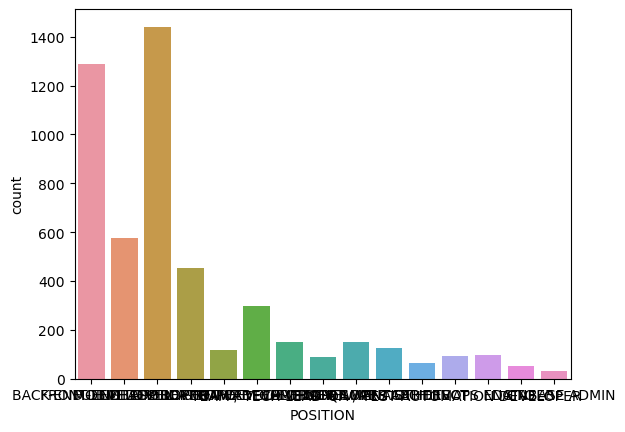

                 EXPERIENCE      Ratio
1 - 3 Yıl              1201  23.895742
3 - 5 Yıl               900  17.906884
0 - 1 Yıl               746  14.842817
7 - 10 Yıl              624  12.415440
5 - 7 Yıl               617  12.276164
10 - 14 Yıl             596  11.858337
15 Yıl ve üzeri         342   6.804616
##########################################


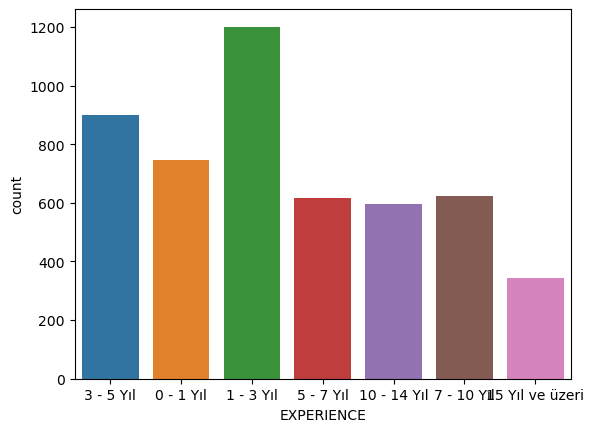

       GENDER      Ratio
Erkek    4493  89.395145
Kadın     533  10.604855
##########################################


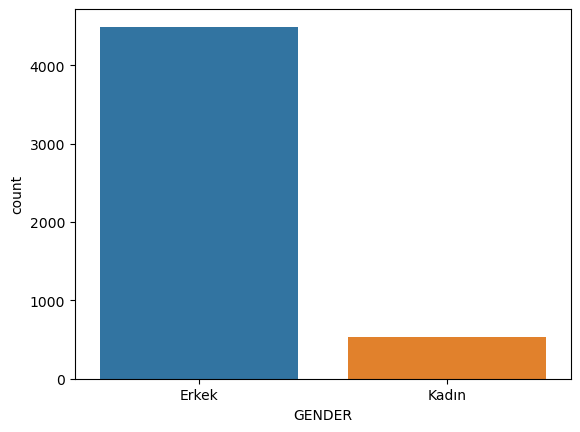

                         COMPANY      Ratio
Kurumsal                    2463  49.005173
Startup                     1152  22.920812
E-Ticaret                    593  11.798647
Outsource                    370   7.361719
DIGER                        148   2.944688
Dijital / Reklam Ajansı      145   2.884998
Oyun                         104   2.069240
Yazılım & Teknoloji           33   0.656586
Fintech / Finans              18   0.358138
##########################################


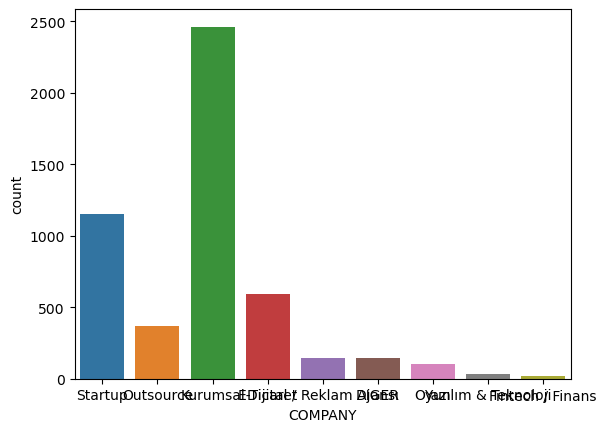

               WORK_TYPE      Ratio
Remote              1957  38.937525
Hibrit              1395  27.755671
Ofis                 803  15.976920
Geçici Remote        547  10.883406
Geçici Hibrit        324   6.446478
##########################################


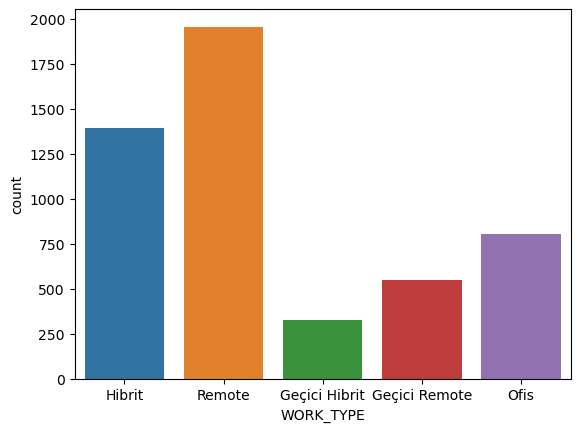

           CITY     Ratio
yurt_ici   4636  92.24035
yurt_disi   390   7.75965
##########################################


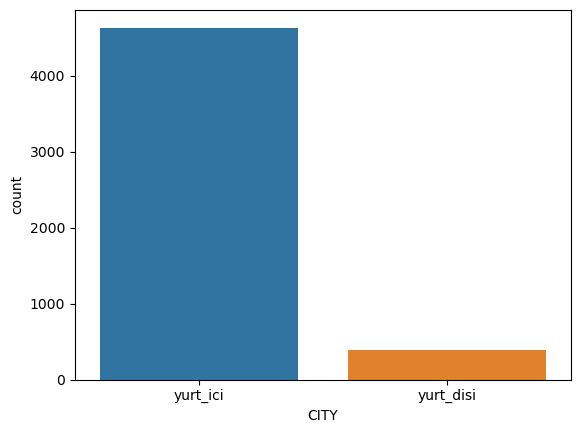

                 CURRENCY      Ratio
₺ - Türk Lirası      4493  89.395145
$ - Dolar             287   5.710306
€ - Euro              199   3.959411
£ - Sterlin            47   0.935137
##########################################


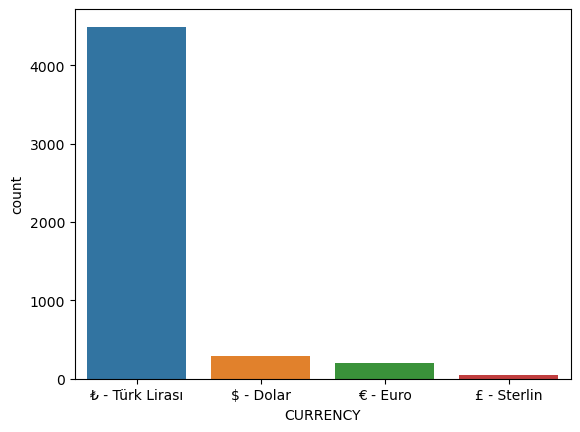

In [8]:
for col in cat_cols:
    cat_summary(df, col)

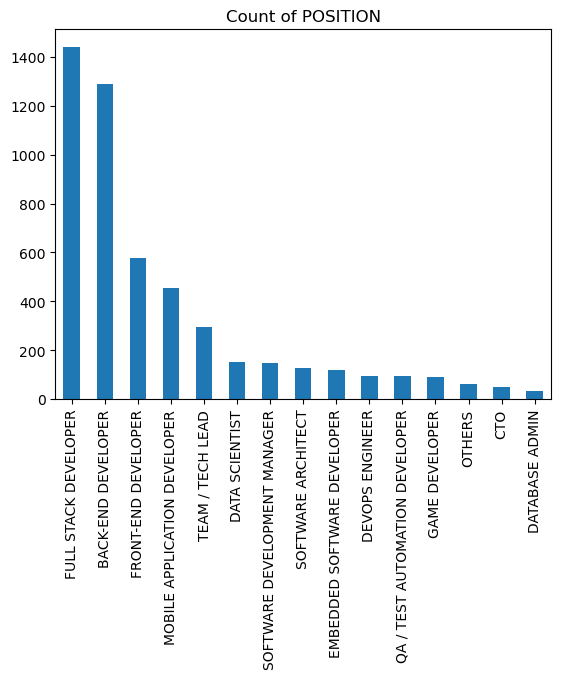

In [9]:
#POSİTION SAYILARININ DAĞILIMI

df["POSITION"].value_counts().plot(kind='bar')
plt.title("Count of POSITION")
plt.show(block=True)

In [10]:
#WORK_TYPE LEVEL KIRILIMINDA DEĞERLERİ
df.groupby(["WORK_TYPE", "LEVEL"]).agg({"LEVEL": "count"})

LEVEL
WORK_TYPE     LEVEL        
Geçici Hibrit Junior     73
              Middle    111
              Senior    140
Geçici Remote Junior    132
              Middle    186
              Senior    229
Hibrit        Junior    349
              Middle    398
              Senior    648
Ofis          Junior    276
              Middle    284
              Senior    243
Remote        Junior    456
              Middle    644
              Senior    857

In [11]:
#POZİSYONLARIN CİNSİYET KIRILIMINDA DEĞERLERİ
df.groupby(["POSITION", "GENDER"]).agg({"POSITION": "count"})

POSITION
POSITION                       GENDER          
BACK-END DEVELOPER             Erkek       1153
                               Kadın        137
CTO                            Erkek         49
                               Kadın          2
DATA SCIENTIST                 Erkek        120
                               Kadın         30
DATABASE ADMIN                 Erkek         28
                               Kadın          5
DEVOPS ENGINEER                Erkek         84
                               Kadın         12
EMBEDDED SOFTWARE DEVELOPER    Erkek        111
                               Kadın          7
FRONT-END DEVELOPER            Erkek        505
                               Kadın         71
FULL STACK DEVELOPER           Erkek       1280
                               Kadın        161
GAME DEVELOPER                 Erkek         86
                               Kadın          3
MOBILE APPLICATION DEVELOPER   Erkek        417
                               Kadın         36
OTHERS                         Erkek         49
                               Kadın         14
QA / TEST AUTOMATION DEVELOPER Erkek         64
                               Kadın         31
SOFTWARE ARCHITECT             Erkek        119
                               Kadın          7
SOFTWARE DEVELOPMENT MANAGER   Erkek        142
                               Kadın          7
TEAM / TECH LEAD               Erkek        286
                               Kadın         10

In [12]:
#POZİSYONLARIN LEVEL KIRILIMINDA MAAŞLARI VE POZİSYONDA ÇALIŞAN SAYISI
df.groupby(["POSITION","LEVEL"]).agg({"SALARY_AVG_TL": "mean", "POSITION":"count"})

SALARY_AVG_TL  POSITION
POSITION                       LEVEL                          
BACK-END DEVELOPER             Junior   11575.704615       325
                               Middle   21291.812367       469
                               Senior   31404.792339       496
CTO                            Junior  236868.000000         1
                               Middle   24499.000000         1
                               Senior   59608.591837        49
DATA SCIENTIST                 Junior   18792.100000        60
                               Middle   19501.820000        50
                               Senior   35865.400000        40
DATABASE ADMIN                 Junior    7499.000000        10
                               Middle   10582.333333        12
                               Senior   28915.000000        11
DEVOPS ENGINEER                Junior   10540.028571        35
                               Middle   20957.000000        30
                               Senior   33946.935484        31
EMBEDDED SOFTWARE DEVELOPER    Junior   13811.047619        42
                               Middle   13832.333333        36
                               Senior   39824.025000        40
FRONT-END DEVELOPER            Junior   10978.004785       209
                               Middle   21652.603687       217
                               Senior   34156.146667       150
FULL STACK DEVELOPER           Junior   12490.089783       323
                               Middle   18189.897921       529
                               Senior   27896.633277       589
GAME DEVELOPER                 Junior   17518.794118        34
                               Middle   30119.156250        32
                               Senior   43141.478261        23
MOBILE APPLICATION DEVELOPER   Junior   14184.777108       166
                               Middle   23263.853503       157
                               Senior   32989.953846       130
OTHERS                         Junior   19728.578947        19
                               Middle   18228.363636        22
                               Senior   42850.363636        22
QA / TEST AUTOMATION DEVELOPER Junior   16360.288889        45
                               Middle   28638.473684        38
                               Senior   45486.000000        12
SOFTWARE ARCHITECT             Junior    8784.714286         7
                               Middle   23615.000000         6
                               Senior   37786.938053       113
SOFTWARE DEVELOPMENT MANAGER   Junior   30140.750000         4
                               Middle   25721.222222         9
                               Senior   39080.676471       136
TEAM / TECH LEAD               Junior   46560.500000         6
                               Middle   30885.800000        15
                               Senior   37448.112727       275

In [13]:
#LEVEL IN WORK_TYPE KIRILIMINDA MIN MAX DEĞERLERİ VE SAYILARI
df.groupby(["LEVEL","WORK_TYPE"]).agg({"SALARY_AVG_TL": "mean", "WORK_TYPE":"count"})

SALARY_AVG_TL  WORK_TYPE
LEVEL  WORK_TYPE                              
Junior Geçici Hibrit   11802.452055         73
       Geçici Remote   12372.818182        132
       Hibrit          14479.845272        349
       Ofis            10213.858696        276
       Remote          14549.692982        456
Middle Geçici Hibrit   19166.297297        111
       Geçici Remote   19650.005376        186
       Hibrit          22068.170854        398
       Ofis            12994.580986        284
       Remote          23674.257764        644
Senior Geçici Hibrit   30205.992857        140
       Geçici Remote   29343.397380        229
       Hibrit          33780.913580        648
       Ofis            23173.131687        243
       Remote          38078.376896        857